<a href="https://colab.research.google.com/github/phfreitas27/ProjetoA3/blob/main/A3-1%C2%BA-Metodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado de máquina - Árvore de decisão

##Informações sobre o base de dados

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import numpy as np


data = pd.read_csv('/content/drive/MyDrive/Python Scripts/amazon_products.csv')

display(data.info())

base = np.array(data[['stars','reviews','price','listPrice','category_id','boughtInLastMonth']])

#Tratamento da váriavel target
le = preprocessing.LabelEncoder()
target = le.fit_transform(data[['isBestSeller']])
target = np.array(target)

#exibindo a base de dados
#display(base.head())
#display(base.info())

##Dividindo a base para treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base,target,test_size=0.35)

##Treinando o modelo

In [ ]:
treino = tree.DecisionTreeClassifier(criterion='entropy',max_depth= 5)
treino = treino.fit(X_train,y_train)
predictions = treino.predict(X_test)

acuracia = accuracy_score(y_test,predictions)

##Acurácia

In [ ]:
print('Acuracia de Decisão:',round(acuracia,5))

Acuracia de Decisão: 0.99402


##Matriz de confusão

In [ ]:
import pandas as pd

print('\nMatriz de confusão: \n',pd.crosstab(y_test,predictions,rownames=['Real'], colnames=['Predito'],margins=True, margins_name='Todos'))


Matriz de confusão: 
 Predito       0   1   Todos
Real                       
0        496226   3  496229
1          2981   8    2989
Todos    499207  11  499218


##Relatório de Qualidade

In [ ]:
import sklearn.metrics as metrics

print('Relatório sobre qualidade:\n')
print(metrics.classification_report(y_test, predictions, target_names=['False', 'True']))

Relatório sobre qualidade:

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    496229
        True       0.73      0.00      0.01      2989

    accuracy                           0.99    499218
   macro avg       0.86      0.50      0.50    499218
weighted avg       0.99      0.99      0.99    499218



##Árvore de Decisão

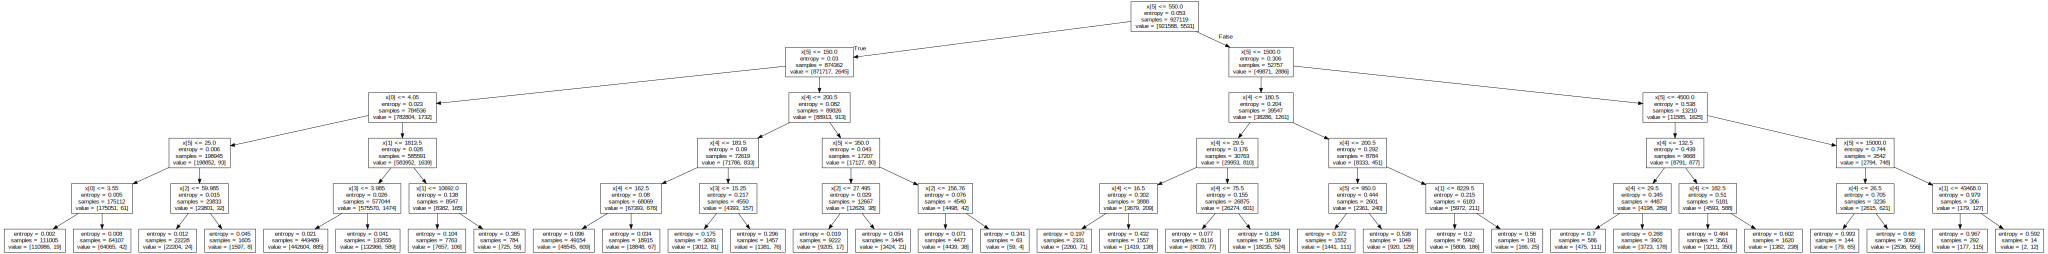

In [ ]:
import graphviz

dot_data = tree.export_graphviz(treino,out_file=None)
graph =  graphviz.Source(dot_data)
graph.render('IsBestSeller')
graph